In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [6]:
import matplotlib.pyplot as plt

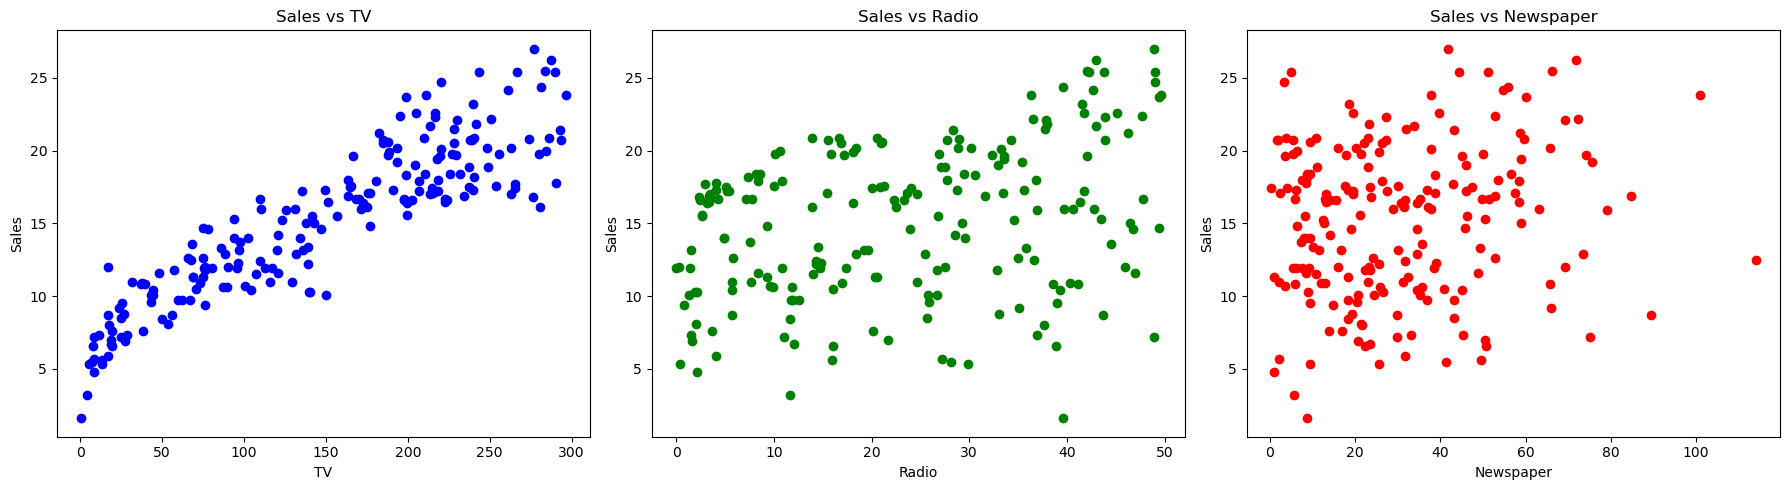

In [7]:
plt.figure(figsize=(18, 5))

# Scatter plot: Sales vs TV
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'], color='blue')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('Sales')

# Scatter plot: Sales vs Radio
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'], color='green')
plt.title('Sales vs Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')

# Scatter plot: Sales vs Newspaper
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'], color='red')
plt.title('Sales vs Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [8]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


# Define features and target

In [9]:
X = np.array(data.drop(["Sales"], axis=1))
y = np.array(data["Sales"])

In [10]:
X.shape, y.shape

((200, 3), (200,))

# Split the data into training and testing sets


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a Linear Regression model and train

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set


In [13]:
y_pred = model.predict(X_test)

## Evaluate the model


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.9380152204802874
R^2 Score: 0.8692052734910128


## Plot the true vs predicted values for Sales


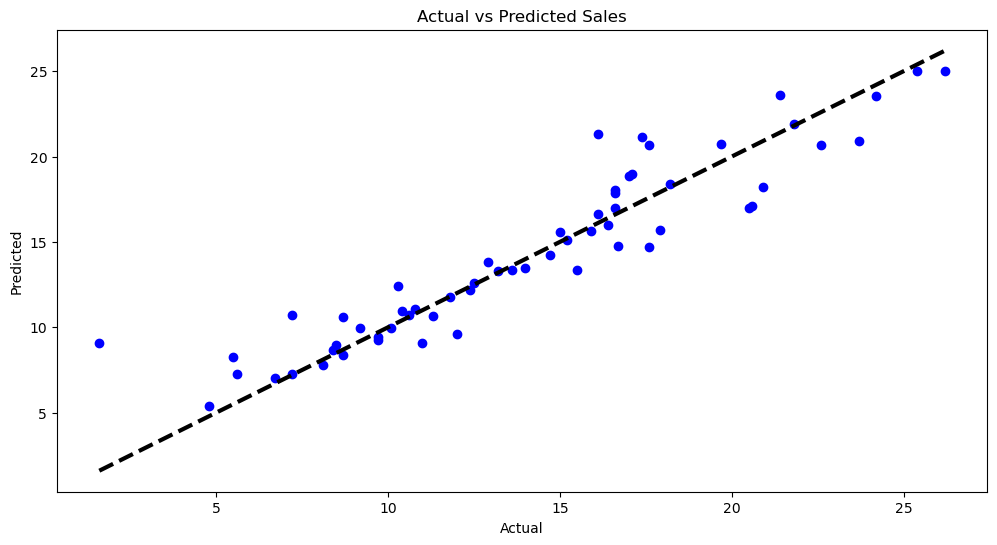

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()

In [16]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.34072636]
